In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dask.array as da
import datetime 
import gc
from multiprocessing import pool
import cPickle as pickle
import os
import feather

In [3]:
subdf=dd.read_parquet("../input/scratch/home_attributes_history/"+'home_attributes_2017_v1.parq')

In [5]:
lotsizesquarefeet=subdf[['parcelid','lotsizesquarefeet','finishedsquarefeet']].compute()

In [6]:
taxdata=feather.read_dataframe("../input/tmp_R_sales.feather",
                               columns=['assessmentyear','state','county','parcelid',
                                        'landmarketvalue','landassessedvalue',
                                       'improvementassessedvalue','improvementmarketvalue'])

In [7]:
newdata=pd.merge(taxdata,lotsizesquarefeet, on='parcelid', how="left")

In [8]:
newdata.shape

(84932226, 10)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


19 (422709, 11)


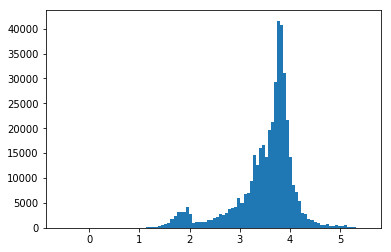

36 (5915038, 11)


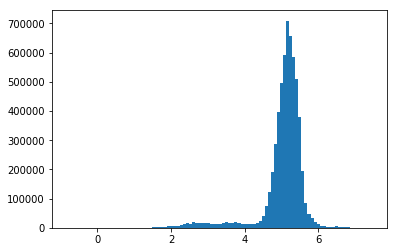

37 (17626178, 11)


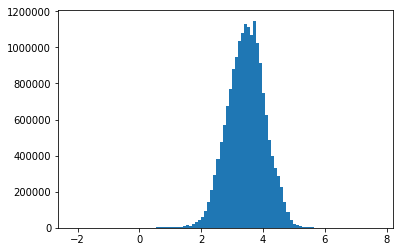

39 (21976704, 11)


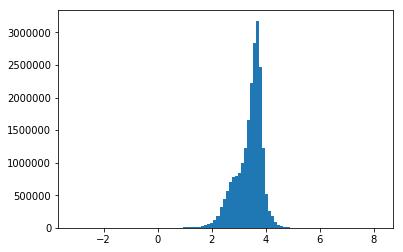

In [9]:
for state in ['19','36','37','39']:
    b=newdata[newdata['state']==state]
    b['ratio']=b['landmarketvalue']/b['lotsizesquarefeet']*1800
    b=b[b['ratio']>0]
    print state,b.shape
    plt.hist(np.log10(b['ratio']),bins=100); plt.show()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


06 (17319443, 11)


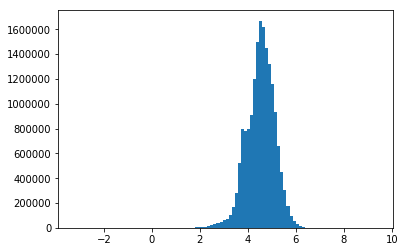

19 (3416954, 11)


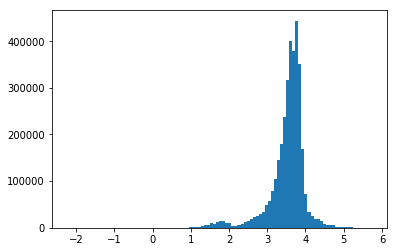

36 (5915038, 11)


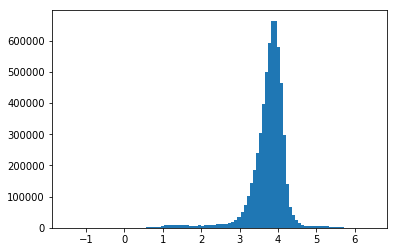

37 (16471240, 11)


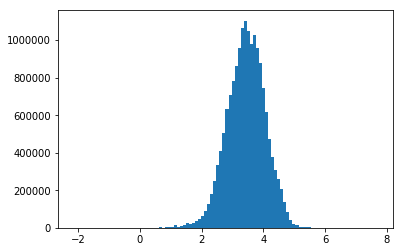

39 (21897600, 11)


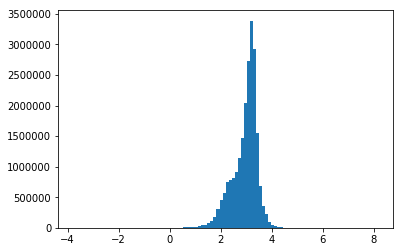

In [10]:
for state in ['06', '19','36','37','39']:
    b=newdata[newdata['state']==state]
    b['ratio']=b['landassessedvalue']/b['lotsizesquarefeet']*1800
    b=b[b['ratio']>0]
    print state,b.shape
    plt.hist(np.log10(b['ratio']),bins=100); plt.show()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


19 (447972, 11)


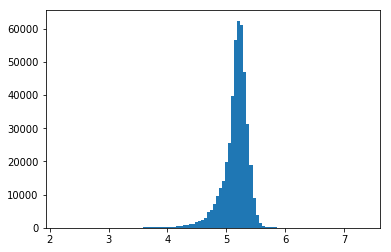

36 (6779158, 11)


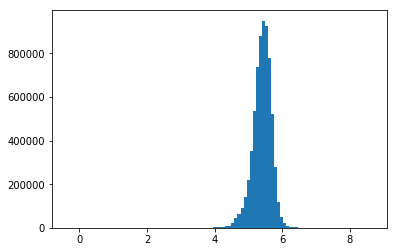

37 (18579945, 11)


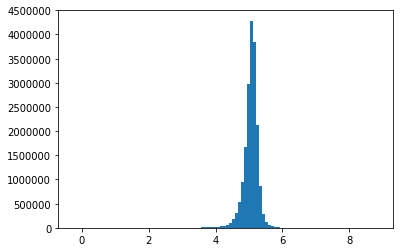

39 (24252187, 11)


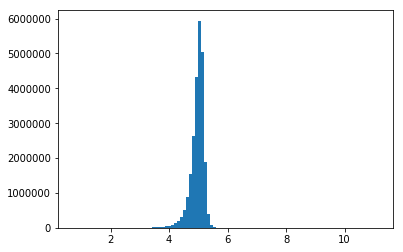

In [12]:
for state in ['19','36','37','39']:
    b=newdata[newdata['state']==state]
    b['ratio']=b['improvementmarketvalue']/b['finishedsquarefeet']*1800
    b=b[b['ratio']>0]
    print state,b.shape
    plt.hist(np.log10(b['ratio']),bins=100); plt.show()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


06 (18755443, 11)


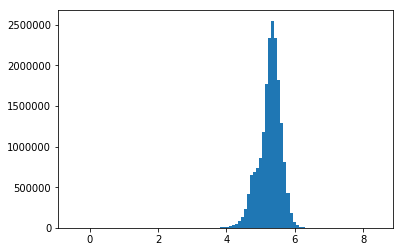

19 (3228753, 11)


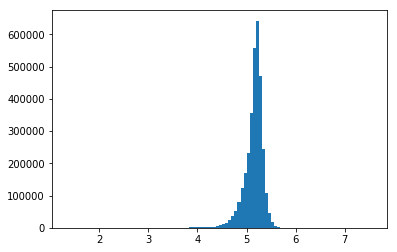

36 (6779150, 11)


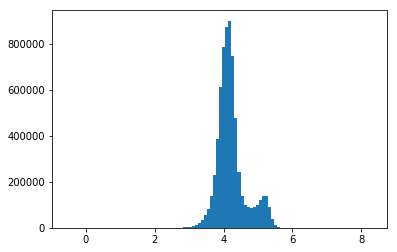

37 (16798403, 11)


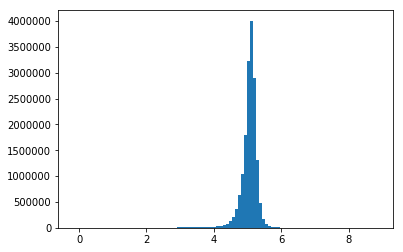

39 (24041908, 11)


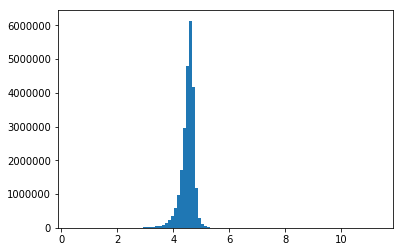

In [13]:
for state in ['06', '19','36','37','39']:
    b=newdata[newdata['state']==state]
    b['ratio']=b['improvementassessedvalue']/b['finishedsquarefeet']*1800
    b=b[b['ratio']>0]
    print state,b.shape
    plt.hist(np.log10(b['ratio']),bins=100); plt.show()